In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
#reading in file and fixing the horsepower column
df = pd.read_csv('/home/drieshuybens/Deep_learning/auto.csv')
df.drop(df.loc[df['horsepower']=='?'].index, inplace=True)
df[[x for x in df.columns if x not in ['name']]] = df[[x for x in df.columns if x not in ['name']]].astype(int)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')


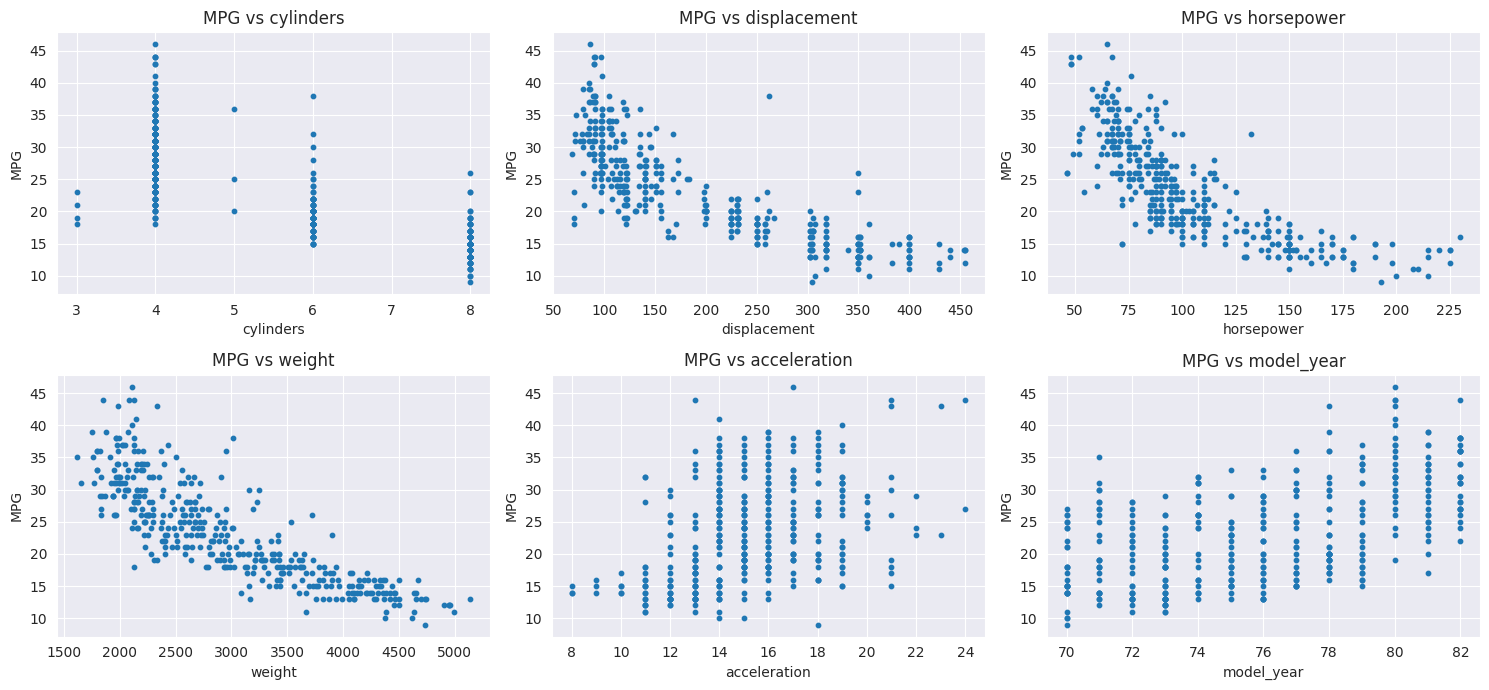

In [6]:

## Plot data
print(df.columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
for i, feature in enumerate([f for f in df.columns if f not in ['mpg', 'origin', 'name']]):
    row = i // 3
    col = i % 3

    axes[row, col].scatter(df[feature], df['mpg'], s=10)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('MPG')
    axes[row, col].set_title('MPG vs {}'.format(feature))

plt.tight_layout()
plt.show()



        

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     603.6
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           3.27e-81
Time:                        09:11:00   Log-Likelihood:                -1174.9
No. Observations:                 392   AIC:                             2354.
Df Residuals:                     390   BIC:                             2362.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.6690      0.711     55.819      0.0

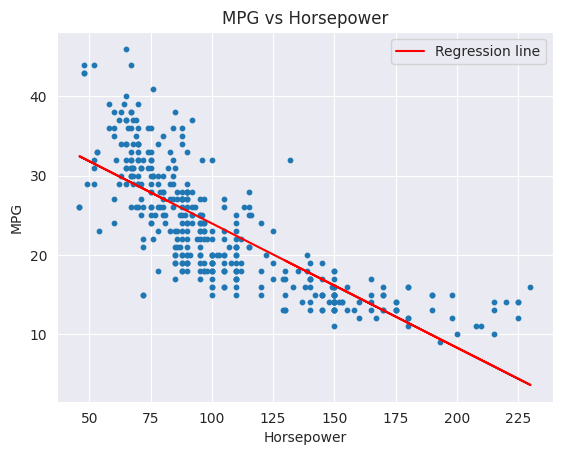

In [7]:
#perform linear regression using OLS with horsepower as a feature and value mpg as target
model = sm.regression.linear_model.OLS(df['mpg'],sm.add_constant(df['horsepower']))
model_fit = model.fit()
print(model_fit.summary())
#plot the linear regression line from p
plt.scatter(df['horsepower'], df['mpg'], s=10)
plt.plot(df['horsepower'], model_fit.fittedvalues, 'r', label='Regression line')

plt.xlabel('Horsepower')
plt.ylabel('MPG')

plt.title('MPG vs Horsepower')

plt.legend()
plt.show()




                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     318.1
Date:                Thu, 10 Aug 2023   Prob (F-statistic):          3.60e-104
Time:                        09:11:18   Log-Likelihood:                -1115.0
No. Observations:                 392   AIC:                             2238.
Df Residuals:                     388   BIC:                             2254.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           44.6723      1.179     37.897   

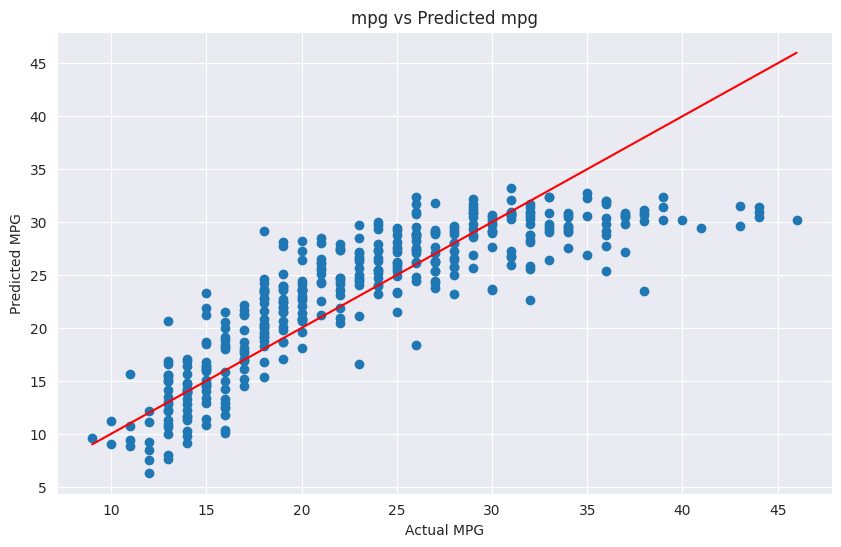

In [8]:
#perform linear regression using OLS with horsepower, weight adn displacement as a feature and value mpg as target
y = df['mpg']
X = df[['horsepower','weight','displacement']]
X = sm.add_constant(X)
model = sm.regression.linear_model.OLS(y, X)
model = model.fit()
print(model.summary())
#plot the linear regression line from p
y_pred = model.predict(X)

# Plot the original data and regression line
plt.figure(figsize=(10, 6))

plt.scatter(y, y_pred)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')

plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')

plt.title('mpg vs Predicted mpg')

plt.show()


In [18]:
#non-linear regressions 
X = df['horsepower']
X = 1/X
X = sm.add_constant(X)
model = sm.regression.linear_model.OLS(df['mpg'], X)
model_fit = model.fit()
print(model_fit.summary())
#plot the linear regression line from p
plt.scatter(df['horsepower'], df['mpg'], s=10)
plt.plot(df['horsepower'], model_fit.fittedvalues, 'r', label='Regression line')

plt.xlabel('Horsepower')
plt.ylabel('MPG')

plt.title('MPG vs Horsepower')

plt.legend()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     795.4
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           3.53e-96
Time:                        09:28:26   Log-Likelihood:                -1140.3
No. Observations:                 392   AIC:                             2285.
Df Residuals:                     390   BIC:                             2293.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8643      0.724      5.335      0.0

AttributeError: module 'matplotlib.pyplot' has no attribute 'clear'